# Text Preprocessing and EDA

## Introduction

This is an Natural Language Processing project in which the goal is to develop a model that can predict to which job category or technology a particular resume belongs to. The dataset contains a the text extracted from a lot of resumes and the respective technology to which each resume belongs to.

So, there are 4 categories or technologies here. These are PeoplSoft, ReactJS, SQL, and Workday. So a resume will belong to one of these 4 categories.

The initial step in this project will be the text preprocessing which is to clean the data and the exploratory data analysis to get a better understanding of the data.

The Text Preprocessing involves -

1. the tokenization of the text data,
2. lowering the case of all letters,
3. removing the stop words and unwanted characters,
4. then converting all words to their base form using the stemming or lemmatization techniques.

This process will clean the text and make everything suitable to be used during the EDA and the model building phases.

The EDA process involves exploration of the text data. Here, different methods are there to explore the data. We can check -

1. the frequently occuring words or check the words frequency,
2. extract named entities like people or organization names in the text,
3. extract the nouns and verbs in the text data,
4. make word cloud plots that will display all the words in the text with the size of the word proportional to its frequency.

-------------

## Import the libraries

In [1]:
import re
import nltk
import string
import spacy
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from bs4 import BeautifulSoup

from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from wordcloud import WordCloud, STOPWORDS
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Resume_data.csv')
data

Category                                        Resume_Info
0   PeopleSoft Developer  Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...
1   PeopleSoft Developer  \r\r\r\r\r\r\t\r\rProfile Summary:\t\t\t\t\t\t...
2   PeopleSoft Developer  PeopleSoft Database Administrator\r           ...
3   PeopleSoft Developer  Classification: Internal\n\nClassification: In...
4   PeopleSoft Developer  Priyanka Ramadoss\r61/46, MountPleasant, \rCoo...
..                   ...                                                ...
74    Work_Day Developer  \tWorkday Integration Consultant\r\rName      ...
75    Work_Day Developer  Srikanth (WORKDAY hCM Consultant)\t           ...
76    Work_Day Developer  WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...
77    Work_Day Developer  Venkateswarlu.B\t\t\t\t\t\t\t\tWorkday Consult...
78    Work_Day Developer  Vinay kumar .v\nWorkday Functional Consultant\...

[79 rows x 2 columns]

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Category     79 non-null     object
 1   Resume_Info  79 non-null     object
dtypes: object(2)
memory usage: 1.4+ KB


In [4]:
data['Category'].value_counts()

React JS Developer      22
Work_Day Developer      21
PeopleSoft Developer    20
SQL Developer           16
Name: Category, dtype: int64

## Text cleaning functions
Here are some functions that would be required to clean the text in the rows. We need to remove unnecessary spaces, punctuations, unwanted words and so on.

In [5]:
from nltk.corpus import wordnet

def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

import string
import nltk
from nltk import ne_chunk, pos_tag, word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\harivars\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\harivars\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\harivars\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\harivars\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [6]:
def remove_contractions(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "cannot", phrase)
    phrase = re.sub(r"Page", "", phrase)
    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

def remove_punctuations(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    cleaned = cleaned.strip()
    cleaned = cleaned.replace("\n"," ")
    return cleaned

def clean_sentences(sentence):
    sentence = str(sentence)
    sentence= re.sub(r"http\S+", "", sentence)
    sentence = BeautifulSoup(sentence, 'lxml').get_text()
    sentence = remove_contractions(sentence)
    sentence = remove_punctuations(sentence)
    sentence = re.sub("\S*\d\S*", "", sentence).strip()
    sentence = re.sub('[^A-Za-z]+', ' ', sentence)
    sentence = re.sub(r"\s(?P<char>\S)\s", ' ', sentence)
    sentence = re.sub(r"(\w)\1{2,}", ' ', sentence)
    sentence = re.sub(r"\b\w{1,2}\b", ' ', sentence)
    sentence = re.sub(r"bjbjb", ' ', sentence)
    stop_words = set(stopwords.words('english'))
    stop_words.update(['zero','one','two','three','four','five','six','seven','eight','nine','ten','may','also','across','among','beside','however','yet','within'])
    filtered_words = [e.lower() for e in sentence.split() if e.lower() not in  stopwords.words('english')]
    pos_tags = pos_tag(filtered_words)
    lemmatized_words = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    return " ".join(lemmatized_words)

In [7]:
data['Cleaned_text'] = data['Resume_Info'].apply(lambda x: clean_sentences(x))

In [8]:
data

Category                                        Resume_Info  \
0   PeopleSoft Developer  Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...   
1   PeopleSoft Developer  \r\r\r\r\r\r\t\r\rProfile Summary:\t\t\t\t\t\t...   
2   PeopleSoft Developer  PeopleSoft Database Administrator\r           ...   
3   PeopleSoft Developer  Classification: Internal\n\nClassification: In...   
4   PeopleSoft Developer  Priyanka Ramadoss\r61/46, MountPleasant, \rCoo...   
..                   ...                                                ...   
74    Work_Day Developer  \tWorkday Integration Consultant\r\rName      ...   
75    Work_Day Developer  Srikanth (WORKDAY hCM Consultant)\t           ...   
76    Work_Day Developer  WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...   
77    Work_Day Developer  Venkateswarlu.B\t\t\t\t\t\t\t\tWorkday Consult...   
78    Work_Day Developer  Vinay kumar .v\nWorkday Functional Consultant\...   

                                         Cleaned_text  
0   anubhav kumar singh core competency script she...  
1   profile summary year experience implement upgr...  
2   peoplesoft database administrator gangareddy p...  
3   classification internal classification interna...  
4   priyanka ramadoss mountpleasant coonoor nilgir...  
..                                                ...  
74  workday integration consultant name sri krishn...  
75  srikanth workday hcm consultant seek suitable ...  
76  workday hcm fcm name kumar role workday consul...  
77  venkateswarlu workday consultant year experien...  
78  vinay kumar workday functional consultant expe...  

[79 rows x 3 columns]

In [9]:
data_clean = data.drop('Resume_Info', axis = 1)
data_clean

Category                                       Cleaned_text
0   PeopleSoft Developer  anubhav kumar singh core competency script she...
1   PeopleSoft Developer  profile summary year experience implement upgr...
2   PeopleSoft Developer  peoplesoft database administrator gangareddy p...
3   PeopleSoft Developer  classification internal classification interna...
4   PeopleSoft Developer  priyanka ramadoss mountpleasant coonoor nilgir...
..                   ...                                                ...
74    Work_Day Developer  workday integration consultant name sri krishn...
75    Work_Day Developer  srikanth workday hcm consultant seek suitable ...
76    Work_Day Developer  workday hcm fcm name kumar role workday consul...
77    Work_Day Developer  venkateswarlu workday consultant year experien...
78    Work_Day Developer  vinay kumar workday functional consultant expe...

[79 rows x 2 columns]

In [10]:
data_clean.to_csv('Cleaned_resumes.csv')

## EDA
### Frequently occuring words

In [11]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\harivars\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [12]:
stopWords = set(stopwords.words('english')+['``',"''"])
total_words =[]
sentences = data_clean['Cleaned_text'].values
cleaned_sentences = ""
for sentence in sentences:
    cleaned_text = sentence
    cleaned_sentences += cleaned_text
    required_words = nltk.word_tokenize(cleaned_text)
    for word in required_words:
        if word not in stopWords and word not in string.punctuation:
            total_words.append(word)
    
word_freq_dist = nltk.FreqDist(total_words)
most_common_words = word_freq_dist.most_common(50)
print(most_common_words)

[('experience', 636), ('application', 533), ('report', 532), ('server', 510), ('work', 507), ('use', 504), ('peoplesoft', 453), ('workday', 430), ('create', 382), ('integration', 372), ('project', 368), ('data', 332), ('process', 302), ('system', 283), ('sql', 279), ('database', 277), ('business', 275), ('test', 266), ('web', 249), ('design', 243), ('tool', 237), ('support', 230), ('client', 226), ('knowledge', 216), ('service', 216), ('requirement', 204), ('develop', 203), ('environment', 202), ('role', 195), ('team', 190), ('involve', 182), ('technology', 181), ('like', 180), ('hcm', 179), ('skill', 178), ('good', 170), ('development', 168), ('change', 160), ('people', 160), ('user', 159), ('technical', 156), ('developer', 152), ('responsibility', 151), ('react', 148), ('various', 146), ('issue', 143), ('oracle', 142), ('eib', 139), ('management', 136), ('security', 135)]


### Recognizing named entities

In [13]:
nlp = spacy.load('en_core_web_lg')
nlp.max_length = 37000000
block = cleaned_sentences[1300:5200]
doc_block = nlp(block)
spacy.displacy.render(doc_block, style= 'ent', jupyter= True)

### Parts of speech tagging
Using the spacy package function '.pos_', we can tag the corresponding parts of speech to each word.

In [14]:
for token in doc_block[:30]:
    print(token, token.pos_) 

velop PROPN
new ADJ
shell NOUN
script NOUN
troubleshoot PROPN
shell NOUN
script NOUN
failure NOUN
techmahindra PROPN
role NOUN
project NOUN
application NOUN
support NOUN
automation NOUN
devops PROPN
tool NOUN
peoplesoft PROPN
admin NOUN
skill NOUN
shell NOUN
script NOUN
linux PROPN
peoplesoft PROPN
administration PROPN
jenkins PROPN
ansible ADJ
project NOUN
people NOUN
tool NOUN
upgrade VERB


### Nouns and Verbs

In [15]:
block = cleaned_sentences[1300:5200]
doc_block = nlp(block)
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN', 'VERB')]
print(nouns_verbs[:250])

['shell', 'script', 'shell', 'script', 'failure', 'role', 'project', 'application', 'support', 'automation', 'tool', 'admin', 'skill', 'shell', 'script', 'project', 'people', 'tool', 'upgrade', 'application', 'upgrade', 'project', 'migration', 'application', 'ntt', 'shell', 'script', 'application', 'requirement', 'work', 'automate', 'start', 'stop', 'activity', 'application', 'knowledge', 'docker', 'apply', 'release', 'application', 'work', 'search', 'configuration', 'peoplesoft', 'gain', 'knowledge', 'understanding', 'unix', 'architecture', 'command', 'trouble', 'shoot', 'use', 'configuration', 'management', 'deployment', 'tool', 'experience', 'job', 'schedule', 'workload', 'knowledge', 'automation', 'use', 'shell', 'script', 'integration', 'management', 'use', 'write', 'playbook', 'perform', 'task', 'manage', 'administration', 'task', 'installation', 'configuration', 'application', 'performance', 'related', 'issue', 'apply', 'patch', 'application', 'work', 'vulnerability', 'report', 

### Adding a word count

In [16]:
cv = CountVectorizer()
X = cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis=0)

words_freq = [(word, sum_words[0,idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df = pd.DataFrame(words_freq)
wd_df.columns = ['Words', 'Count']
wd_df[0:15]

Words  Count
0   application     23
1        server     20
2       upgrade     11
3          tool      8
4      database      7
5        create      7
6        people      6
7          work      6
8         apply      6
9           web      6
10        shell      5
11       script      5
12      project      5
13      support      5
14    knowledge      5

### Graphical representation of word counts

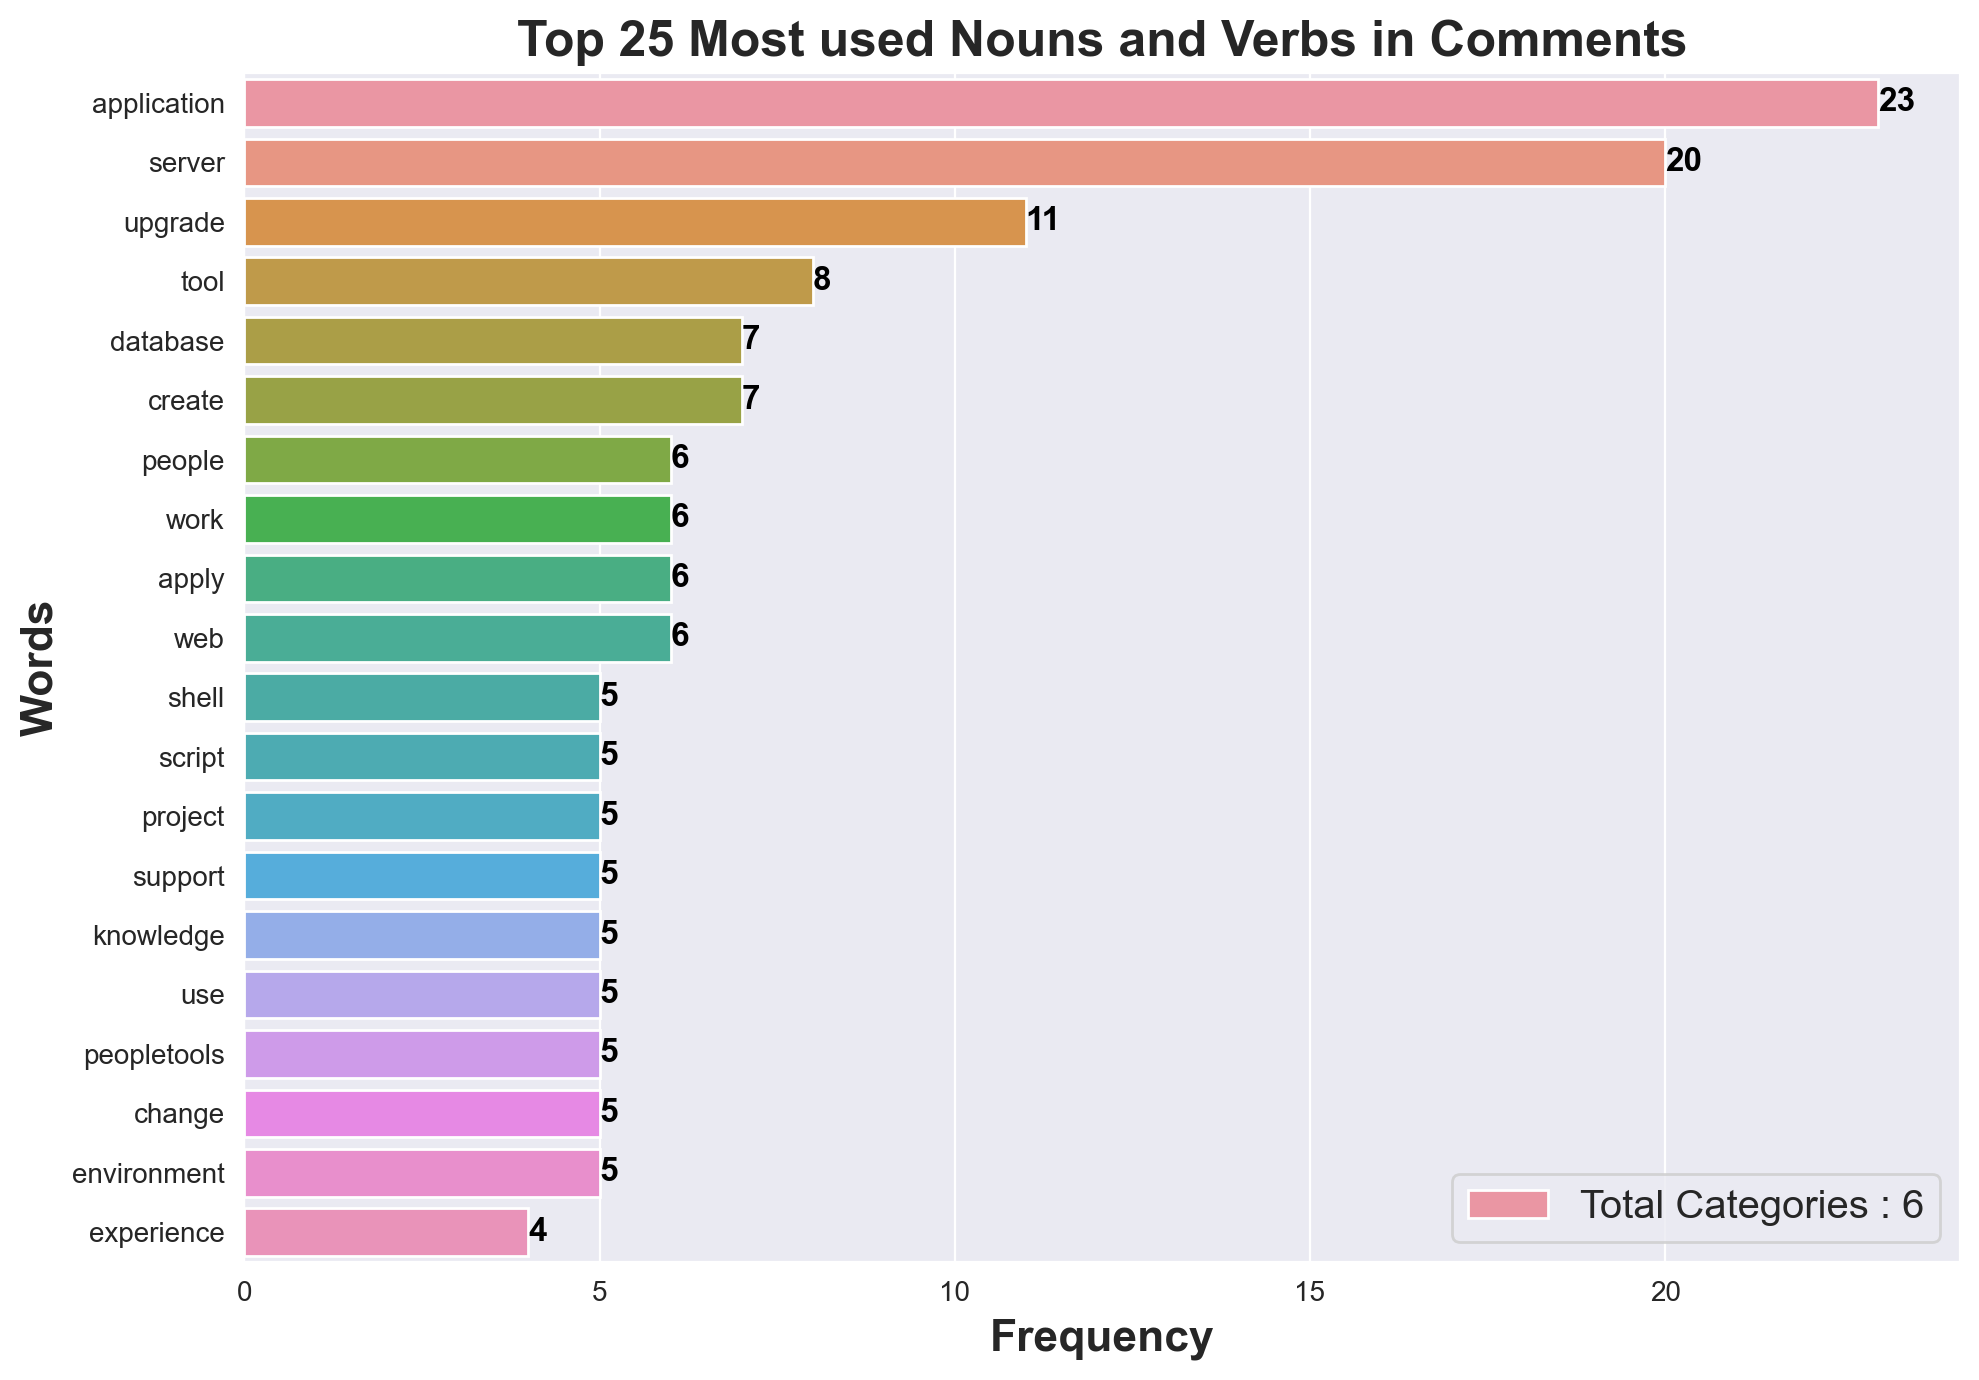

In [17]:
fig, axe = plt.subplots(1,1, figsize=(10,7), dpi=200)
ax = sns.barplot(x= wd_df['Count'].head(20), y= wd_df.Words.head(20), data= wd_df, ax = axe,
            label= 'Total Categories : 4')

axe.set_xlabel('Frequency', size=16,fontweight= 'bold')
axe.set_ylabel('Words', size=16, fontweight= 'bold')
plt.xticks(rotation = 0)
plt.legend(loc='best', fontsize= 'x-large')
plt.title('Top 25 Most used Nouns and Verbs in Comments', fontsize= 18, fontweight= 'bold')
rcParams = {'xtick.labelsize':'14','ytick.labelsize':'14','axes.labelsize':'16'}

for i in ax.containers:
    ax.bar_label(i,color = 'black', fontweight = 'bold', fontsize= 12)

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()

### Word cloud

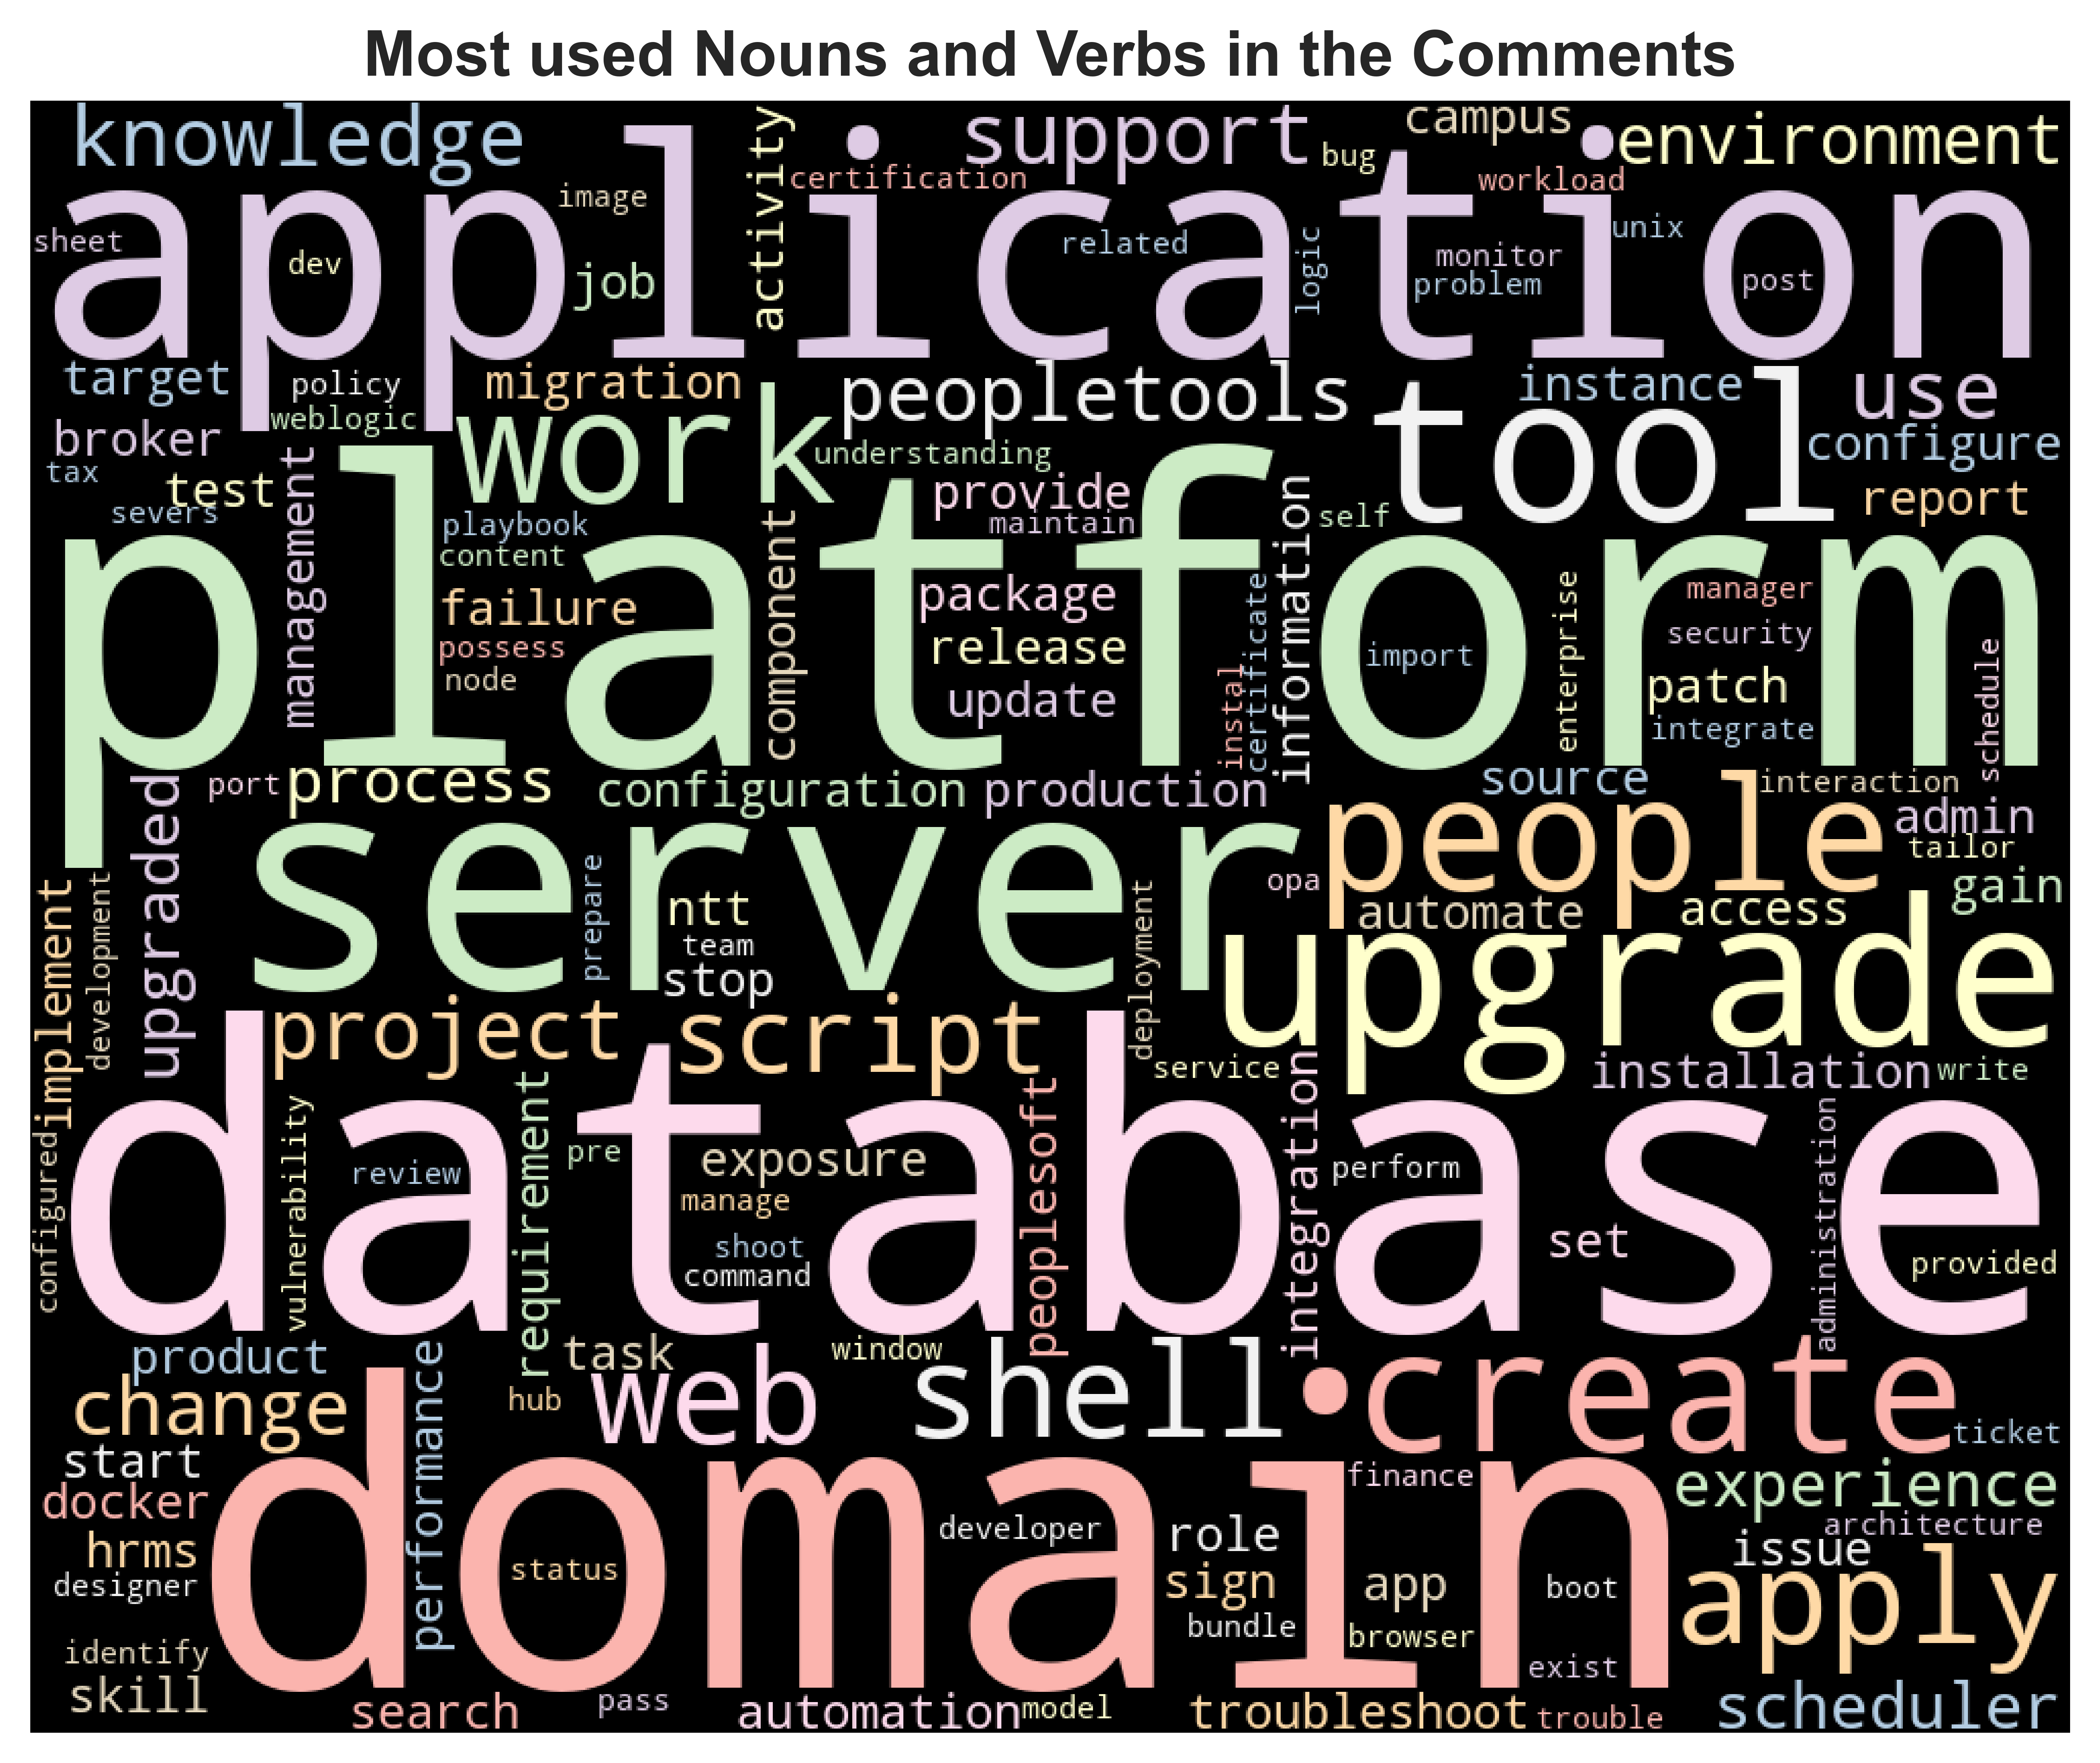

In [18]:
text = " ".join(cat for cat in wd_df.Words) # Creating the text variable

word_cloud = WordCloud(width=1000, height=800, random_state=10, background_color="black", 
                       colormap="Pastel1", collocations=False, stopwords=STOPWORDS).generate(text)

plt.figure(figsize=(10,7), dpi=800) # Display the generated Word Cloud
plt.title('Most used Nouns and Verbs in the Comments', fontsize= 15, fontweight= 'bold')
plt.imshow(word_cloud)
plt.axis("off")

plt.show()

### Word cloud of different categories

Here word clouds of the text data of specific categories can be seen. This will help us in understanding which words are highly influencing a sentence to belong to particular category.

In [19]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()

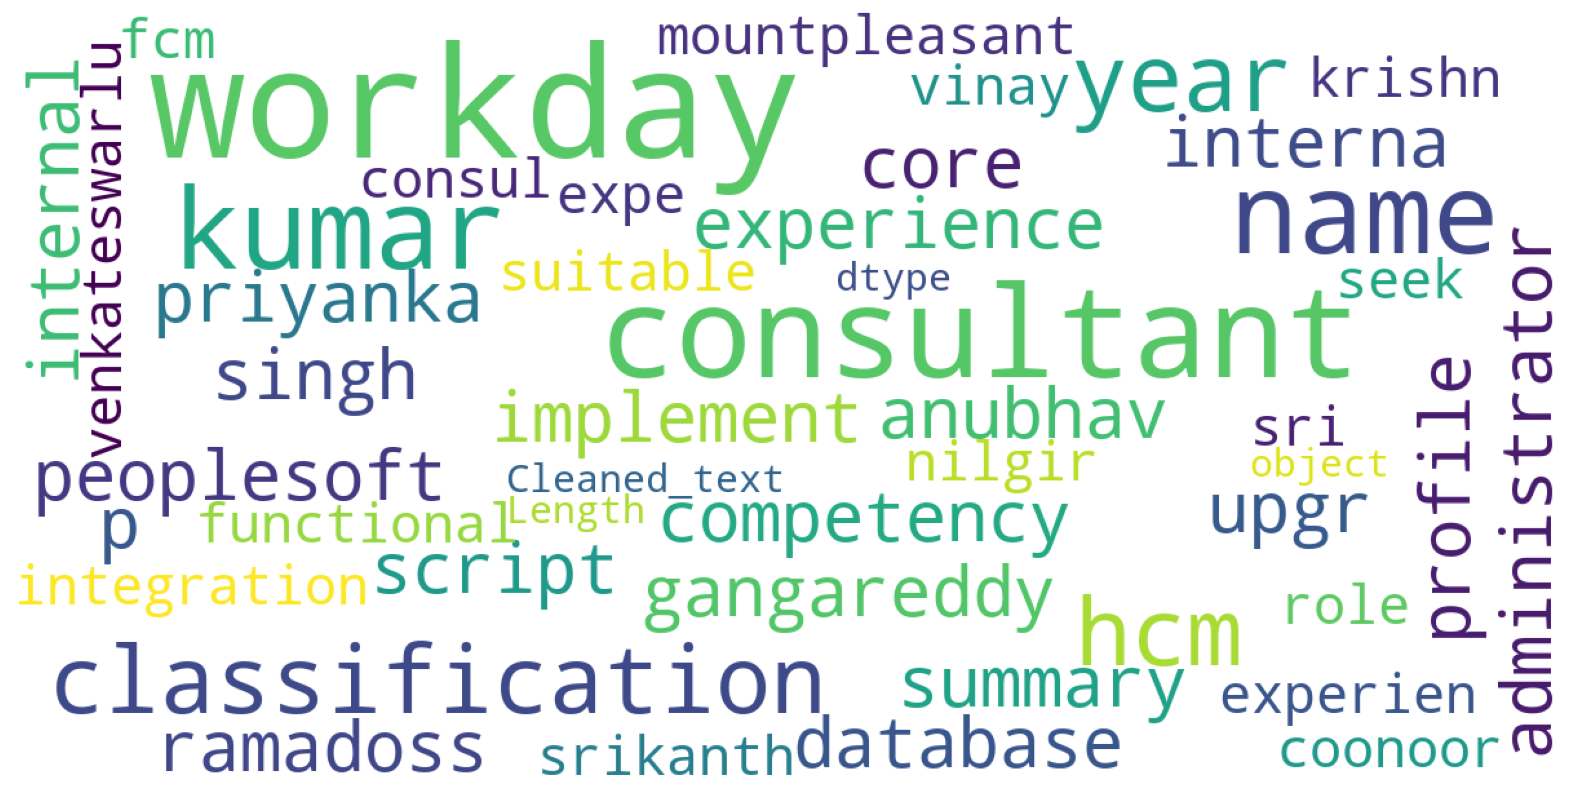

In [20]:
show_wordcloud(data_clean['Cleaned_text'])

--------------

### Wordclouds for each resume category
This will help us in identifying the word that occur with high frequency for each category. This visual representation will help us in differentiating the 4 categories.

----------

In [21]:
data_clean['Category'].unique()

array(['PeopleSoft Developer', 'SQL Developer', 'React JS Developer',
       'Work_Day Developer'], dtype=object)

#### Wordcloud - PeopleSoft

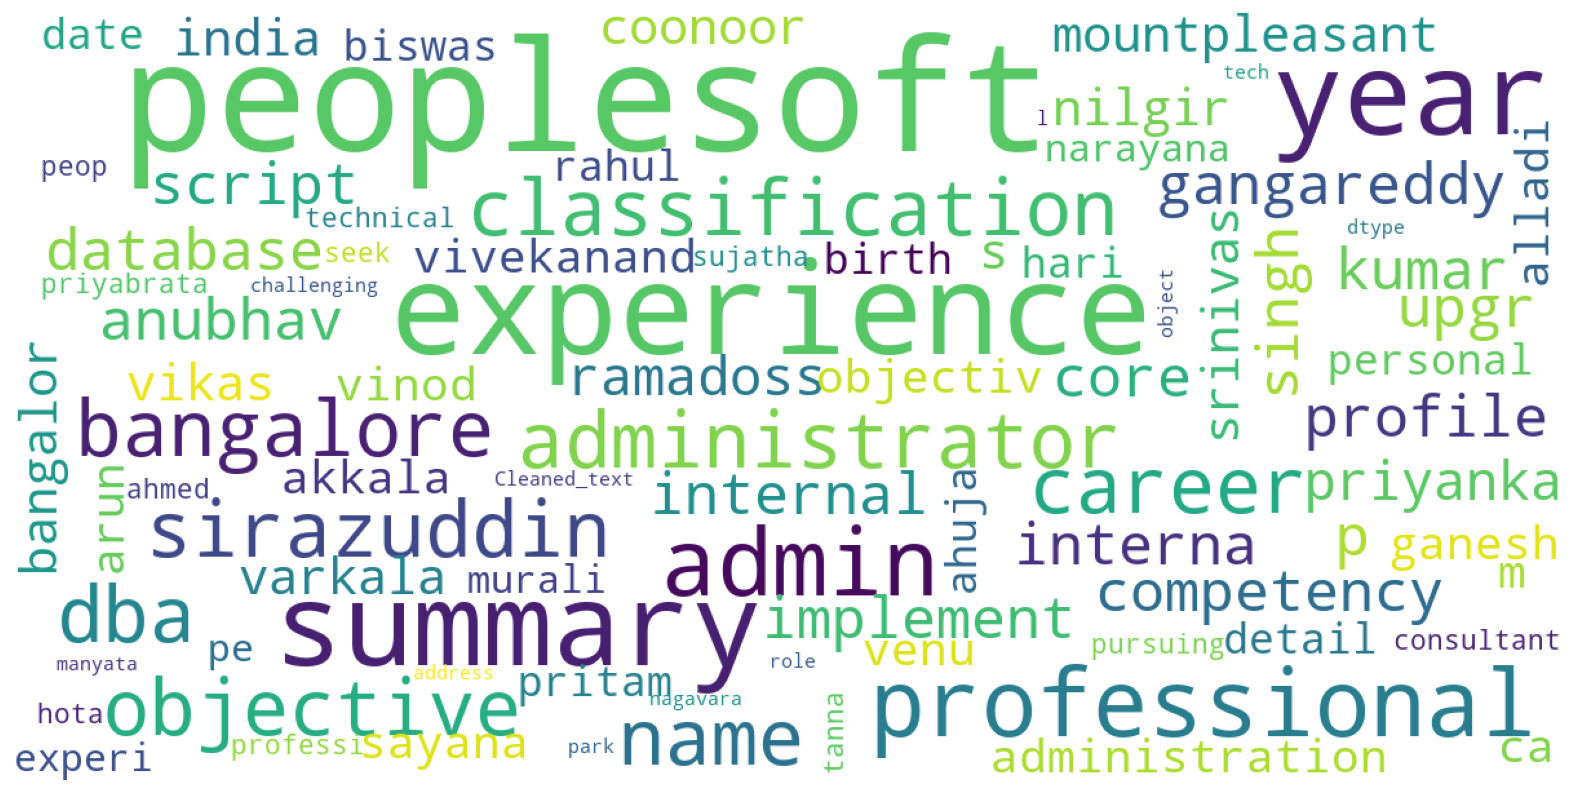

In [22]:
show_wordcloud(data_clean[data_clean['Category'] == 'PeopleSoft Developer']['Cleaned_text'])

#### Wordcloud - SQL

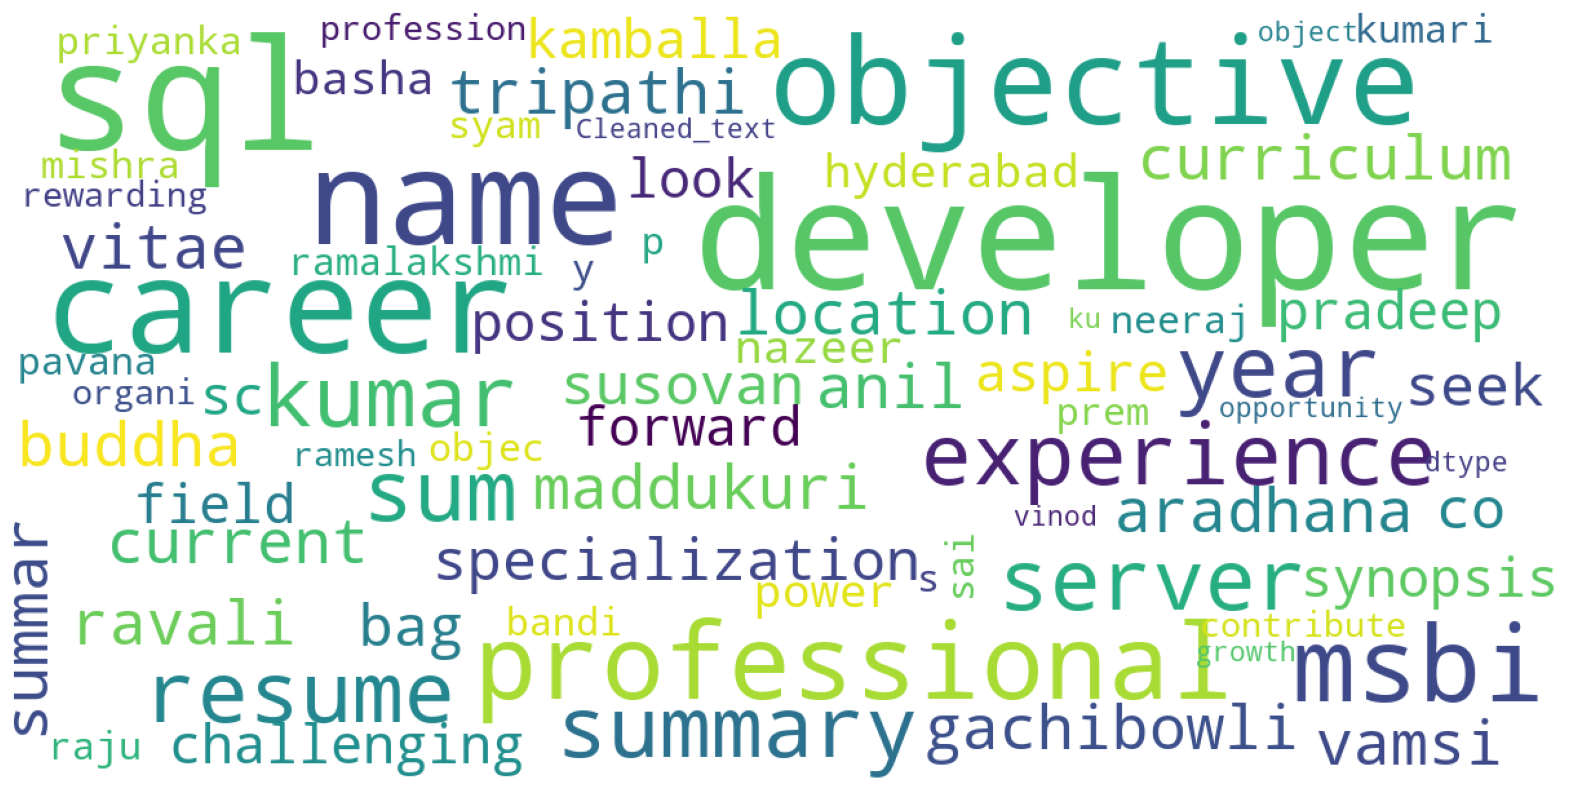

In [23]:
show_wordcloud(data_clean[data_clean['Category'] == 'SQL Developer']['Cleaned_text'])

#### Wordcloud - ReactJS

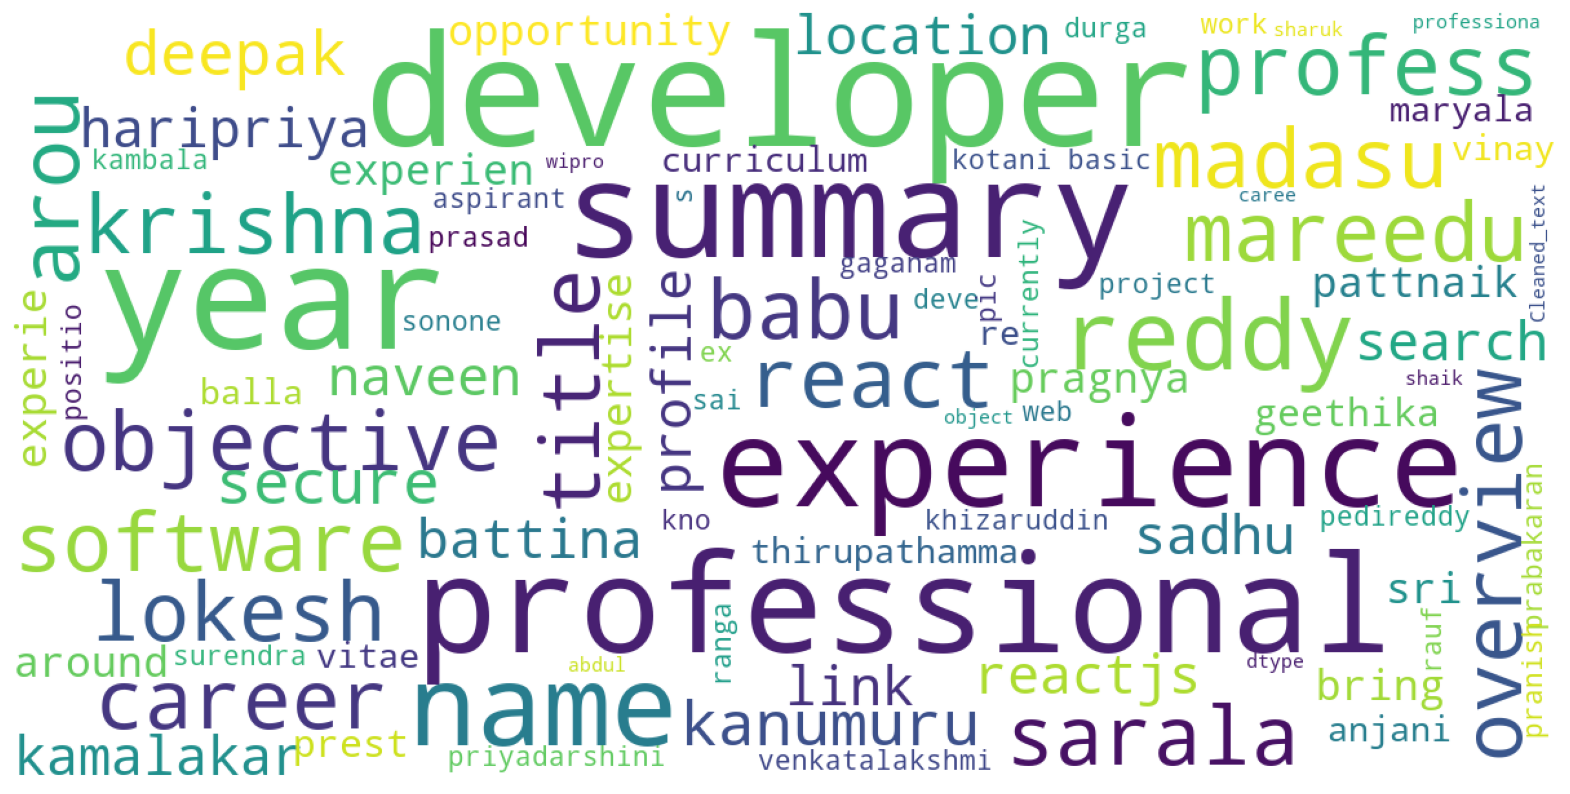

In [24]:
show_wordcloud(data_clean[data_clean['Category'] == 'React JS Developer']['Cleaned_text'])

#### Wordcloud - Work_Day

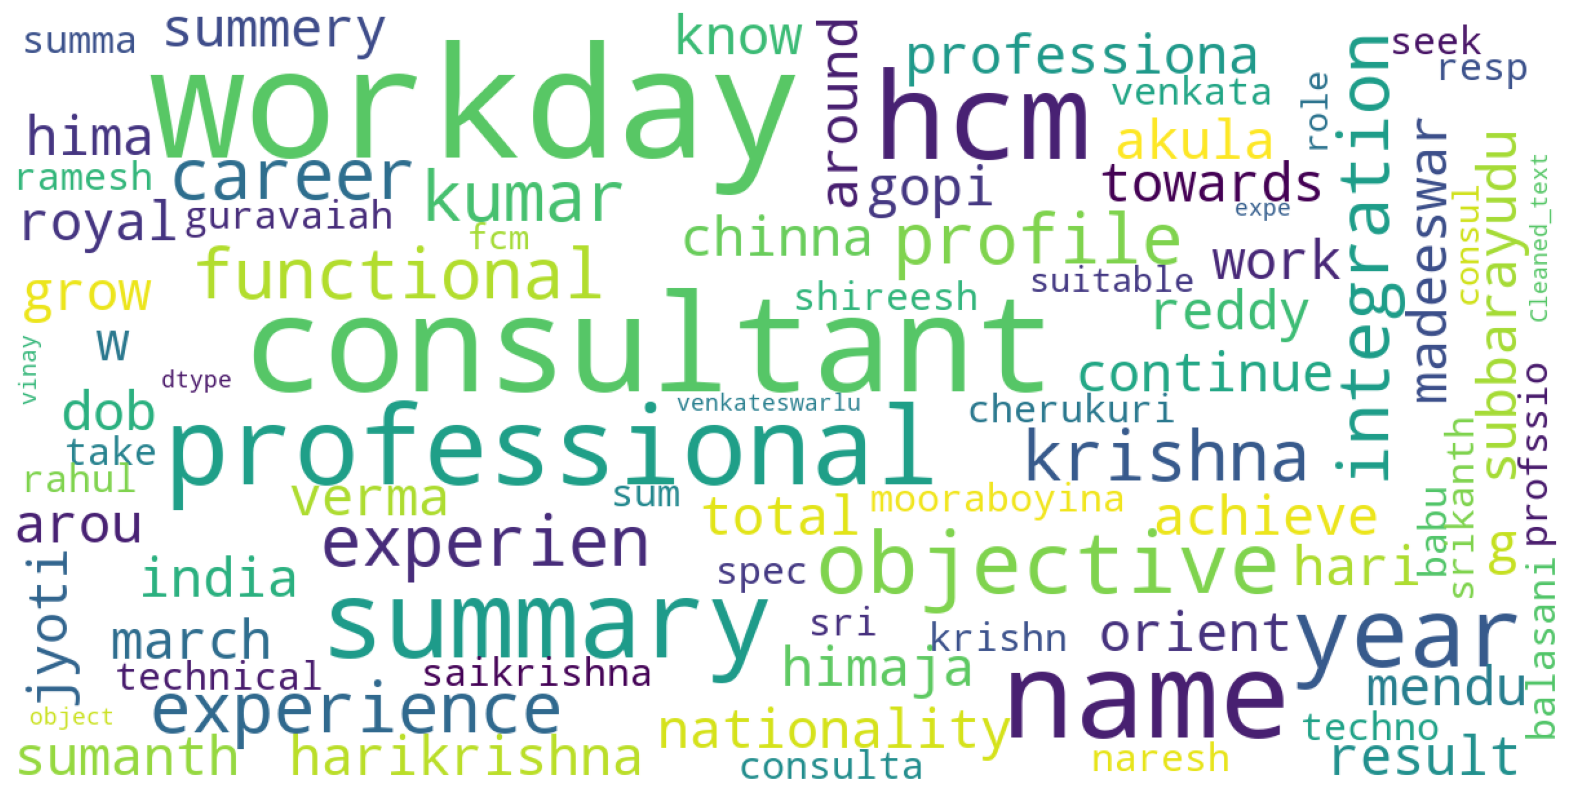

In [25]:
show_wordcloud(data_clean[data_clean['Category'] == 'Work_Day Developer']['Cleaned_text'])

--------------------

Now that the text data is cleaned the next step will be to build a machine learning model that shall be trained on this text data. In order to train the model the text data has to be converted into a vector form. So, the next immediate step would be vectorize the text data. Different techniques are available which are **One-Hot Encoding, Bag of Words or Count Vectorizer, TF-IDF Vectorizer**, out of which the **TF-IDF Vectorizer** is known to give the best results. Alternatively another model called as **Word2Vec** can be used. This model also preserves the semantic meaning of a word and its association with other words which makes it very suitable in a generative models. But since this is a text classification model the **TF-IDF** vectorization is quite sufficient.

After the vectorization the next step would be train the models on this vectorized data.